In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import display
import plotly.express as px
import geopandas as gpd

import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.offline as pyo
import plotly.io as pio

import seaborn as sns

import sys
sys.path.append(os.path.join('..','src'))

from feature_engineering import HotelBookingFeatures
from data_preprocessing import DataPreprocessor
from utils import DataLoader

data_folder = os.path.join('..','data')
file_to_open = os.path.join(data_folder,"hotel_bookings.csv")

In [2]:
# load the data using the DataLoader class
data_loader = DataLoader()
hotel_bookings = data_loader.load_data(file_to_open)

In [3]:
preprocess  = DataPreprocessor()
hotel_bookings = preprocess.fit_transform_without_encoding_variables(hotel_bookings)
hotel_booking_features = HotelBookingFeatures()
hotel_bookings = hotel_booking_features.fit_transform(hotel_bookings)

Converting date columns to datetime...


100%|██████████| 3/3 [00:00<00:00, 51.78it/s]


Date columns converted to datetime.

Dropping rows with missing values...


100%|██████████| 1/1 [00:00<00:00, 12.82it/s]


5 rows dropped from 150000.

Dropping duplicate rows...


100%|██████████| 1/1 [00:00<00:00, 11.61it/s]


33 rows dropped from 149995.

Dropping rows with negative adr...


100%|██████████| 1/1 [00:00<00:00, 41.26it/s]


67 rows dropped from 149962.



In [4]:
df = hotel_bookings[hotel_bookings['is_canceled'] == 0]

In [16]:
numeric_df = hotel_bookings.select_dtypes(include=['int64','int32','float64','datetime64[ns]'])
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149895 entries, 0 to 149999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   arrival_date        149895 non-null  datetime64[ns]
 1   departure_date      149895 non-null  datetime64[ns]
 2   company             149895 non-null  float64       
 3   adr                 149895 non-null  float64       
 4   num_guests          149895 non-null  float64       
 5   adults              149895 non-null  int64         
 6   children            149895 non-null  float64       
 7   babies              149895 non-null  int64         
 8   is_canceled         149895 non-null  int64         
 9   booking_date        149895 non-null  datetime64[ns]
 10  is_weekend_stay     149895 non-null  int64         
 11  num_days_stayed     149895 non-null  int64         
 12  booking_lead_time   149895 non-null  int64         
 13  arrival_dayofweek   149895 non-nul

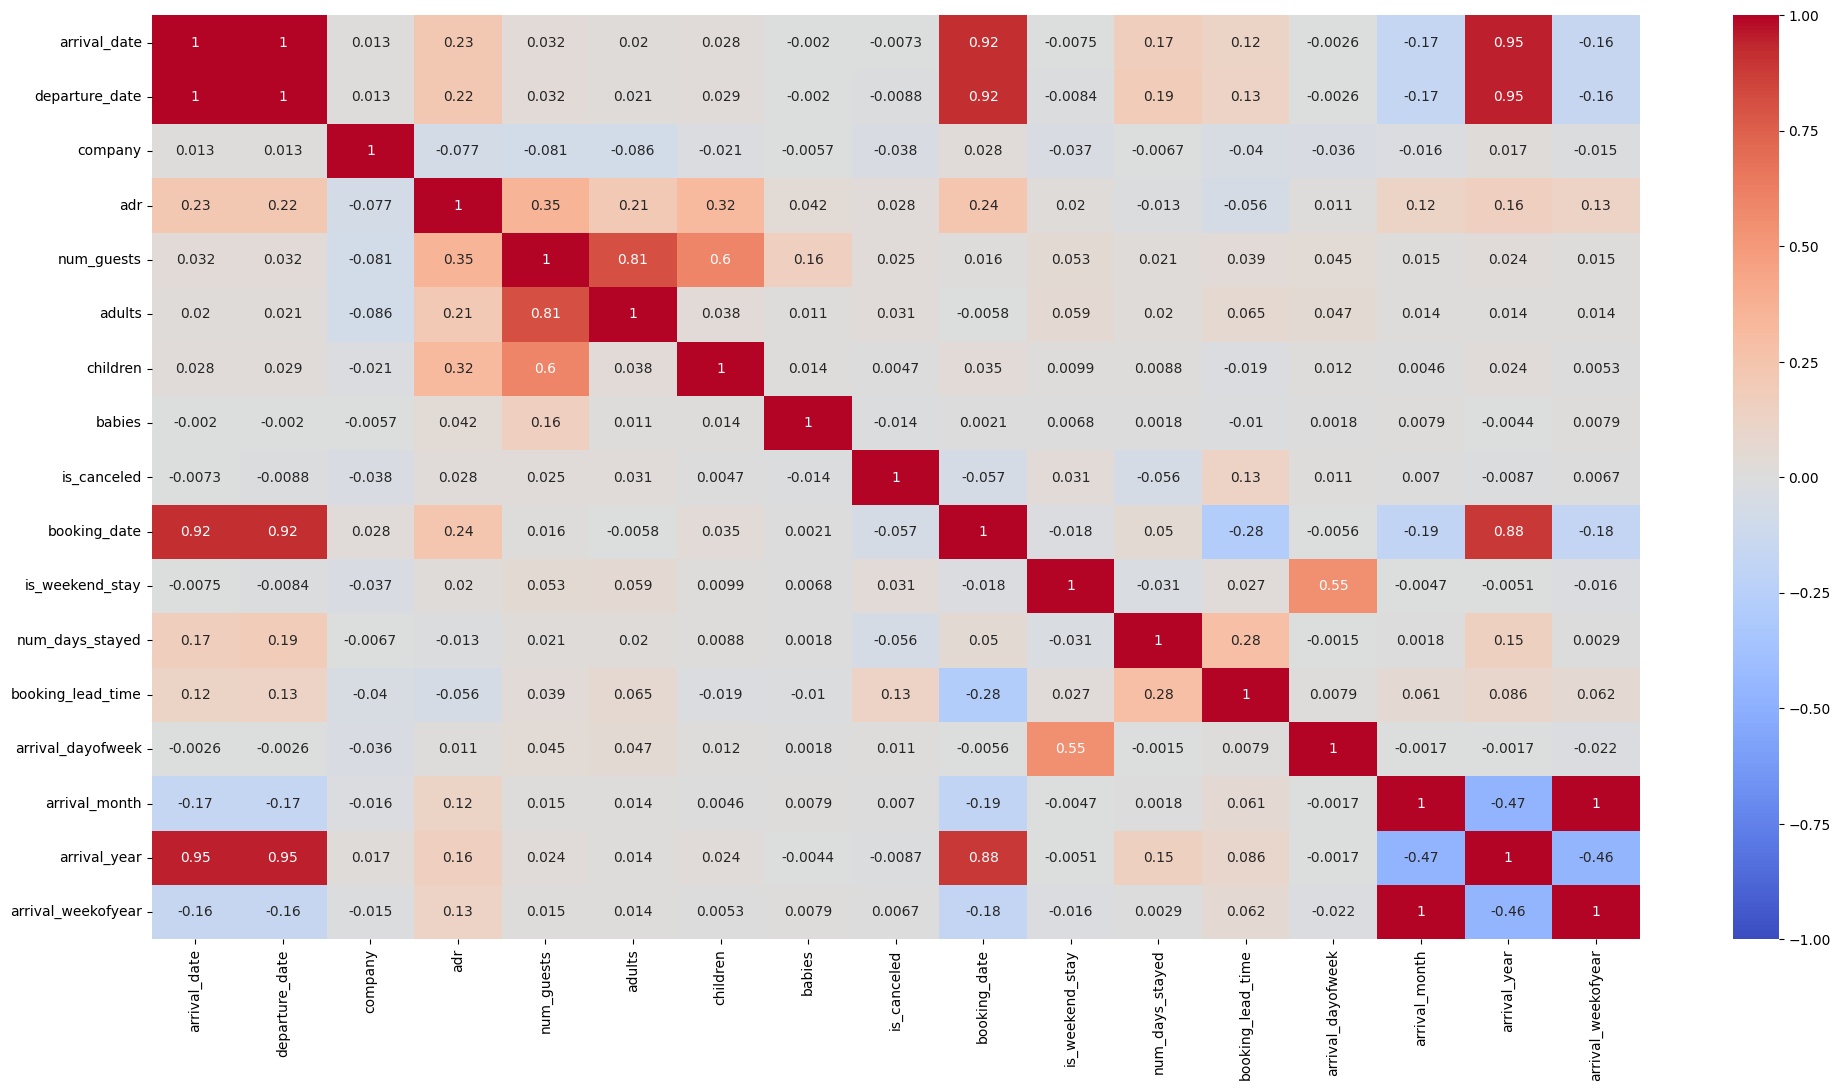

In [25]:
plt.figure(figsize = (24, 12))
# only show above 0.6 or below -0.6
sns.heatmap(numeric_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

In [26]:
cancel_corr = numeric_df.corr()['is_canceled'].abs().sort_values(ascending=False)
cancel_corr

is_canceled           1.000000
booking_lead_time     0.127070
booking_date          0.057200
num_days_stayed       0.056114
company               0.037854
is_weekend_stay       0.031474
adults                0.030911
adr                   0.027627
num_guests            0.024894
babies                0.014107
arrival_dayofweek     0.010970
departure_date        0.008813
arrival_year          0.008737
arrival_date          0.007278
arrival_month         0.007027
arrival_weekofyear    0.006656
children              0.004689
Name: is_canceled, dtype: float64

From this list it is apparent that lead_time is the most important numerical features.